In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import text

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# running out of time, using SQL to fetch the last date in the table.
# Using Textual SQL
# That’s why SQLAlchemy lets you just use strings, for those cases when the SQL is already known 
# https://docs.sqlalchemy.org/en/13/core/tutorial.html#sqlexpression-text
z = text('SELECT date FROM measurement order by date desc limit 1;''')
session.execute(z).fetchall()

[('2017-08-23',)]

In [14]:
# http://localhost:8888/notebooks/10-Advanced-Data-Storage-and-Retrieval/3/Activities/01-Ins_Joins/Solved/Ins_Joins.ipynb
# SELECT date as Date, prcp as Precipitation FROM measurement where date >= date('2017-08-23','-365 days') and prcp >=0 order by date")
# https://stackoverflow.com/questions/8895208/sqlalchemy-how-to-filter-date-field
# Calculate the date 1 year ago from the last data point in the database

# Design a query to retrieve the last 12 months of precipitation data and plot the results
s1 = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date.between('2016-08-23','2017-08-23')).filter(Measurement.prcp >= 0).all()


In [15]:
#type(session) sqlalchemy.orm.session.Session


In [16]:
# https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe

#df_measurements_dt_prcp = pd.read_sql_query(session.statement, session.bind)
df_measurements_dt_prcp_sqlalchemy = pd.DataFrame(s1)
df_measurements_dt_prcp_sqlalchemy.columns = ['Date','Precipitation']
df_measurements_dt_prcp_sqlalchemy.sort_values(by=['Date'])
df_measurements_dt_prcp_sqlalchemy.set_index('Date',drop=True, inplace=True)
df_measurements_dt_prcp_sqlalchemy=df_measurements_dt_prcp_sqlalchemy.astype(float)
df_measurements_dt_prcp_sqlalchemy.groupby(['Date']).sum()

,Precipitation
Date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10
2016-08-29,1.46
2016-08-30,0.07
2016-08-31,3.18


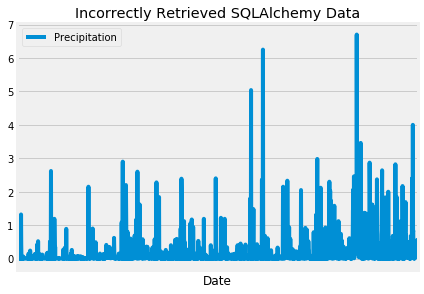

In [17]:
# Precipitation Analysis: From NoteBook: Use Pandas Plotting with Matplotlib to plot the data . 
# Precipitation Analysis: From Instructions: Plot the results using the DataFrame plot method.
# http://localhost:8889/notebooks/10-Advanced-Data-Storage-and-Retrieval/2/Activities/09-Par_EmojiPlotting/Solved/Stu_Plotting.ipynb

# NOTE: my SQLALCHEMY GRAPH IS INCORRECT. USING SQL QUERY BELOW....

df_measurements_dt_prcp_sqlalchemy.plot()
plt.xticks([])
plt.tight_layout()
plt.title('Incorrectly Retrieved SQLAlchemy Data')
plt.grid(b=True,axis='both')

In [18]:
# USING SQL VS SQLALCHEMY...
# Using Textual SQL
# That’s why SQLAlchemy lets you just use strings, for those cases when the SQL is already known 
# https://docs.sqlalchemy.org/en/13/core/tutorial.html#sqlexpression-text
s2 = text(
 "SELECT date as Date, prcp as Precipitation "
"FROM measurement "
 "where date >= date('2017-08-23','-365 days') "
"and prcp >=0 order by date")
session.execute(s2).fetchall()
# type(session) sqlalchemy.orm.session.Session

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [19]:
# https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe
# https://stackoverflow.com/questions/42593104/convert-list-into-a-pandas-data-frame
# https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
# type(df_measurements_dt_prcp) # pandas.core.frame.DataFrame
# Precipitation Analysis: Load the query results into a Pandas DataFrame and set the index to the date column.
# Precipitation Analysis: Sort the DataFrame values by date.

# SQL S2 returns 366 rows, versus SQLAlchemy S1 returning 366 rows.

df_measurements_dt_prcp_SQL = pd.read_sql_query(s2, engine)
df_measurements_dt_prcp_SQL.columns = ['Date','Precipitation']
df_measurements_dt_prcp_SQL.sort_values(by=['Date'])
df_measurements_dt_prcp_SQL.set_index('Date',drop=True, inplace=True)
df_measurements_dt_prcp_SQL=df_measurements_dt_prcp_SQL.astype(float)
df_measurements_dt_prcp_SQL.groupby(['Date']).sum()

,Precipitation
Date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10
2016-08-29,1.46
2016-08-30,0.07
2016-08-31,3.18


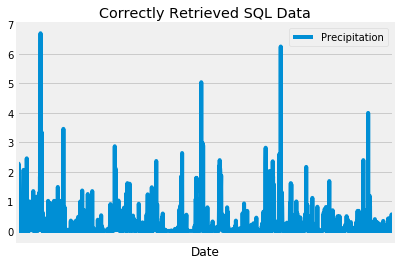

In [20]:
# Precipitation Analysis: From NoteBook: Use Pandas Plotting with Matplotlib to plot the data . 
# Precipitation Analysis: From Instructions: Plot the results using the DataFrame plot method.
# http://localhost:8889/notebooks/10-Advanced-Data-Storage-and-Retrieval/2/Activities/09-Par_EmojiPlotting/Solved/Stu_Plotting.ipynb

df_measurements_dt_prcp_SQL.plot()
plt.xticks([])
plt.title('Correctly Retrieved SQL Data')
plt.grid(b=True, which='minor', axis='both')

![precipitation](Images/precipitation.png)

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

# Describe SQL retrieved correct data...
df_measurements_dt_prcp_SQL.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [22]:
# Describe SQLAlchemy retrieved incorrect data...
df_measurements_dt_prcp_sqlalchemy.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [24]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(Station).group_by(Station.station).count()
print(stations)
type(stations)

9


int

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

zzz = text(
" SELECT station.station as Station, count(measurement.station) as Observations"
" FROM measurement "
" JOIN station on station.station = measurement.station "
" GROUP BY station.name "
" ORDER BY Observations DESC ")
session.execute(zzz).fetchall()
# type(session) sqlalchemy.orm.session.Session

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# https://www.programcreek.com/python/example/88981/sqlalchemy.func.min

# can't get it to work. moving back to SQL...
session.query(Measurement, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs), func.sum(measurement.tobs)/func.count(measurement.tobs)).filter(measurement.station = 'USC00519281')

SyntaxError: keyword can't be an expression (<ipython-input-26-c9d47bc03b4c>, line 6)

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sss = text(
 "SELECT min(tobs), max(tobs), avg(tobs)"
"FROM measurement "
 "where station = 'USC00519281'")
session.execute(sss).fetchall()



[(54.0, 85.0, 71.66378066378067)]

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# http://localhost:8888/notebooks/10-Advanced-Data-Storage-and-Retrieval/3/Activities/01-Ins_Joins/Solved/Ins_Joins.ipynb

# SELECT tobs, count(tobs) FROM measurement where station = 'USC00519281' and date >= date('2017-08-23','-365 days') GROUP BY tobs"
# https://stackoverflow.com/questions/12941416/how-to-count-rows-with-select-count-with-sqlalchemy

al1 =session.query(Measurement.tobs, func.count(Measurement.tobs)).group_by(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date.between('2016-08-23','2017-08-23')).all()


In [29]:
df_measurements_tobs_frequent_yr_sqlalchemy = pd.DataFrame(al1,columns = ['Frequency','tobs'])
df_measurements_tobs_frequent_yr_sqlalchemy.set_index('Frequency',drop=True, inplace=True)
df_measurements_tobs_frequent_yr_sqlalchemy

,tobs
Frequency,
59.0,3
60.0,2
61.0,1
62.0,6
63.0,4
64.0,3
65.0,7
66.0,5
67.0,15


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000235016C92E8>]],
      dtype=object)

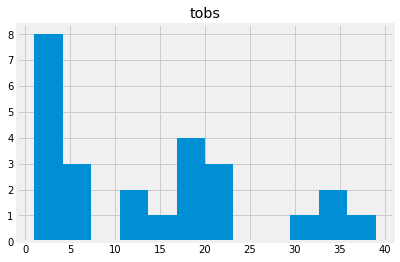

In [30]:
df_measurements_tobs_frequent_yr_sqlalchemy.hist(bins=12)
#plt.xlim(55,80)
#plt.ylim(0,65)

In [31]:
# Using Textual SQL
# That’s why SQLAlchemy lets you just use strings, for those cases when the SQL is already known 
# https://docs.sqlalchemy.org/en/13/core/tutorial.html#sqlexpression-text
sss = text(
 "SELECT tobs, count(tobs)"
"FROM measurement "
 "where station = 'USC00519281' and date >= date('2017-08-23','-365 days') "
"GROUP BY tobs")
session.execute(sss).fetchall()
# type(session) sqlalchemy.orm.session.Session

[(59.0, 3),
 (60.0, 2),
 (61.0, 1),
 (62.0, 6),
 (63.0, 4),
 (64.0, 3),
 (65.0, 7),
 (66.0, 5),
 (67.0, 15),
 (68.0, 12),
 (69.0, 19),
 (70.0, 22),
 (71.0, 18),
 (72.0, 22),
 (73.0, 18),
 (74.0, 39),
 (75.0, 33),
 (76.0, 33),
 (77.0, 31),
 (78.0, 22),
 (79.0, 18),
 (80.0, 11),
 (81.0, 4),
 (82.0, 3),
 (83.0, 1)]

In [32]:
df_measurements_tobs_frequent_yr_SQL = pd.read_sql_query(sss, engine)
df_measurements_tobs_frequent_yr_SQL.columns = ['Frequency','tobs']
df_measurements_tobs_frequent_yr_SQL.set_index('Frequency',drop=True, inplace=True)
df_measurements_tobs_frequent_yr_SQL

,tobs
Frequency,
59.0,3
60.0,2
61.0,1
62.0,6
63.0,4
64.0,3
65.0,7
66.0,5
67.0,15


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002350174FF60>]],
      dtype=object)

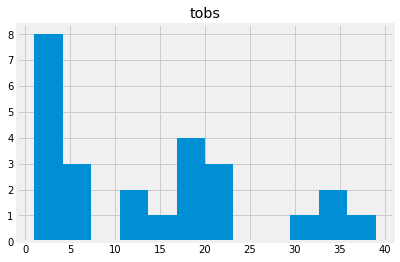

In [33]:
df_measurements_tobs_frequent_yr_SQL.hist(bins=12)
#plt.xlim(55,80)
#plt.ylim(0,65)

![precipitation](Images/station-histogram.png)

In [34]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2012-03-05', '2012-03-17'))

[(61.0, 68.71428571428571, 75.0)]


In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [37]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [38]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [39]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [40]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [41]:
# Plot the daily normals as an area plot with `stacked=False`
